<a href="https://colab.research.google.com/github/AmiAnurag/Stock-Price-prediction/blob/main/closing_value_prediction-part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#Data to be used for training the model
df=pd.read_csv('https://raw.githubusercontent.com/AmiAnurag/Stock-Price-prediction/main/data.csv')
#test data
test_df=pd.read_csv('https://raw.githubusercontent.com/AmiAnurag/Stock-Price-prediction/main/sol.csv')
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,2021-05-25,SBIN,EQ,412.05,415.10,415.50,408.50,414.1,412.35,411.05,56048127,2.303837e+15,348160,14690982,0.2621
1582,2021-05-26,SBIN,EQ,412.35,413.80,418.75,410.80,412.0,413.55,415.44,52357719,2.175128e+15,339506,10006905,0.1911
1583,2021-05-27,SBIN,EQ,413.55,413.70,429.10,412.00,426.8,425.20,419.80,73392997,3.081070e+15,442431,20494556,0.2792
1584,2021-05-28,SBIN,EQ,425.20,430.50,433.65,420.05,422.0,422.05,426.46,65137568,2.777868e+15,423239,14625129,0.2245


In [3]:
df.shape

(1586, 15)

This is the  stock price data of state bank of India . 

The motive of this project is to predict the price for the 2021-June,July,August.

Here we have the data from 2015-Jan to 2021-May

## Time Series Analysis of SBI stock data

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/AmiAnurag/Stock-Price-prediction/main/data.csv',usecols=['Date','Open','Close','High','Low'])
data.head()

,Date,Open,High,Low,Close
0,2015-01-01,312.45,315.00,310.70,314.00
1,2015-01-02,314.35,318.30,314.35,315.25
2,2015-01-05,316.25,316.80,312.10,312.75
3,2015-01-06,310.00,311.10,298.70,299.90
4,2015-01-07,300.00,302.55,295.15,300.15


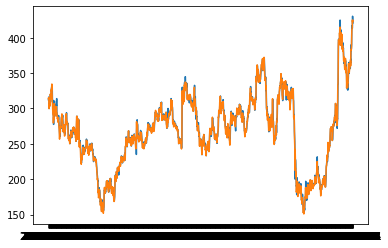

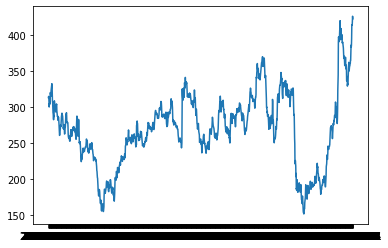

In [5]:
plt.plot(data.Date,data.Open)
plt.plot(data.Date,data.Close)
plt.show()
plt.plot(data.Date,0.5*(pd.to_numeric(data.Close)+pd.to_numeric(data.Open)))
plt.show()
#THis plotting shows the bahaviour of closing rice and opening price is almost same. So an analysis id efficient on open price yhen it will also be efficient for closing price.
#Hence we can reduce the dimension of the dataset by one. Either by dropping any one of Open or Close or by taking avg of Open and close and using it instead of Open and Close columns
# Here i will prefer going with the first way. Here i will be using the Close column

In [6]:
0.5*(pd.to_numeric(data.Close)+pd.to_numeric(data.Open))

0       313.225
1       314.800
2       314.500
3       304.950
4       300.075
         ...   
1581    413.725
1582    413.675
1583    419.450
1584    426.275
1585    422.675
Length: 1586, dtype: float64

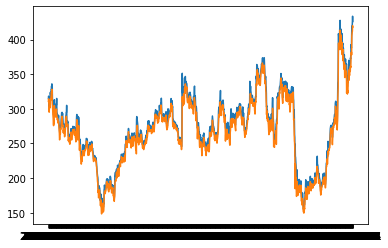

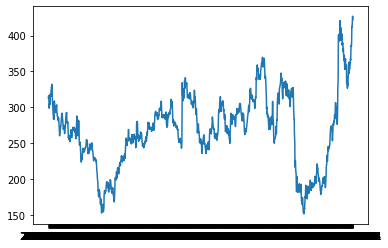

In [7]:
plt.plot(data.Date,data.High)
plt.plot(data.Date,data.Low)
plt.show()
plt.plot(data.Date,0.5*(pd.to_numeric(data.Low)+pd.to_numeric(data.High)))
plt.show()
# as of again the property of both the plots remain same with course of time.
# here i will drop both of the columns as our main focus in time series forecasting is to predict the nature of the graph in future.
# So the result produced for closing price of data will be simmilar for all this columns.
# It will give us a idea of wheather the price is going to fall or rise in the coming months.

In [8]:
data.head()

,Date,Open,High,Low,Close
0,2015-01-01,312.45,315.00,310.70,314.00
1,2015-01-02,314.35,318.30,314.35,315.25
2,2015-01-05,316.25,316.80,312.10,312.75
3,2015-01-06,310.00,311.10,298.70,299.90
4,2015-01-07,300.00,302.55,295.15,300.15


In [9]:
data.drop(columns=['Open','High','Low'],inplace=True)
data.head()

,Date,Close
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75
3,2015-01-06,299.90
4,2015-01-07,300.15


In [10]:
data.columns=['ds','y'] # as this notation is needed for FbProphet analysis

In [11]:
data.head(3) #y--->Close ds--->Date

,ds,y
0,2015-01-01,314.00
1,2015-01-02,315.25
2,2015-01-05,312.75


In [12]:
data.isnull().sum()

ds    0
y     0
dtype: int64

In [13]:
from fbprophet import Prophet

In [14]:
model=Prophet(weekly_seasonality=False,yearly_seasonality=True,daily_seasonality=False,growth='linear')
model.fit(data)
future_dates=model.make_future_dataframe(periods=84)
prediction=model.predict(future_dates)


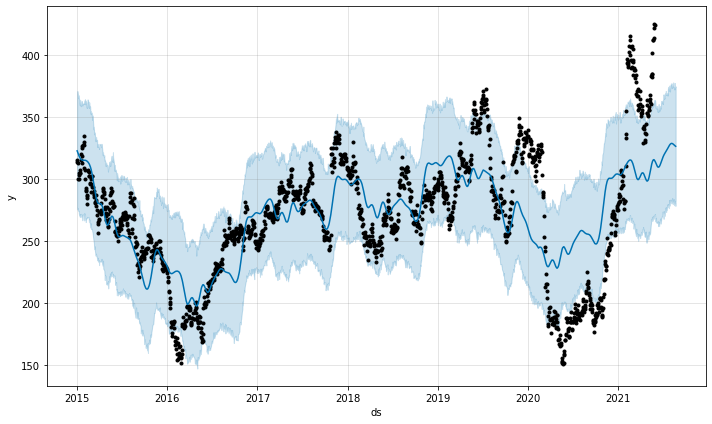

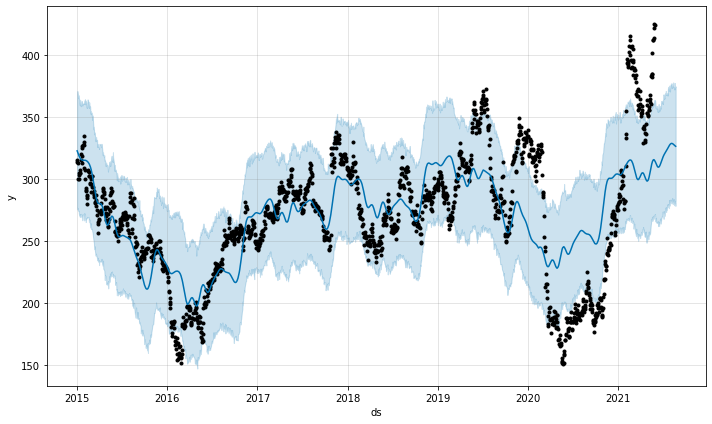

In [15]:
model.plot(prediction)

In [16]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,307.014646,275.425697,367.318862,307.014646,307.014646,15.654832,15.654832,15.654832,15.654832,15.654832,15.654832,0.0,0.0,0.0,322.669479
1,2015-01-02,306.758998,276.779725,370.875388,306.758998,306.758998,15.383052,15.383052,15.383052,15.383052,15.383052,15.383052,0.0,0.0,0.0,322.142050
2,2015-01-05,305.992052,274.638970,366.516475,305.992052,305.992052,14.531583,14.531583,14.531583,14.531583,14.531583,14.531583,0.0,0.0,0.0,320.523635
3,2015-01-06,305.736404,274.205743,365.005343,305.736404,305.736404,14.253309,14.253309,14.253309,14.253309,14.253309,14.253309,0.0,0.0,0.0,319.989712
4,2015-01-07,305.480755,274.394992,364.968528,305.480755,305.480755,13.986680,13.986680,13.986680,13.986680,13.986680,13.986680,0.0,0.0,0.0,319.467435


In [17]:
data_predict=prediction.iloc[:,[0,2,3,15]]
data_predict.head()

,ds,yhat_lower,yhat_upper,yhat
0,2015-01-01,275.425697,367.318862,322.669479
1,2015-01-02,276.779725,370.875388,322.142050
2,2015-01-05,274.638970,366.516475,320.523635
3,2015-01-06,274.205743,365.005343,319.989712
4,2015-01-07,274.394992,364.968528,319.467435


In [18]:
data_predict['ds']=pd.to_datetime(data_predict.ds)
indexed_data_pred=data_predict.set_index('ds')
indexed_data_pred.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,yhat_lower,yhat_upper,yhat
ds,,,
2015-01-01,275.425697,367.318862,322.669479
2015-01-02,276.779725,370.875388,322.142050
2015-01-05,274.638970,366.516475,320.523635
2015-01-06,274.205743,365.005343,319.989712
2015-01-07,274.394992,364.968528,319.467435


In [19]:
test_df['Date']=pd.to_datetime(test_df.Date)
indexed_test_df=test_df.set_index('Date')
indexed_test_df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-06-01,SBIN,EQ,424.35,426.05,435.35,425.60,432.55,432.55,430.82,59299647,2.554720e+15,442654,13242056,0.2233
2021-06-02,SBIN,EQ,432.55,430.80,437.95,429.15,437.20,437.25,434.97,38657806,1.681491e+15,307884,10906691,0.2821
2021-06-03,SBIN,EQ,437.25,437.00,441.95,433.50,439.05,439.65,437.30,38909199,1.701505e+15,281959,12855035,0.3304
2021-06-04,SBIN,EQ,439.65,437.50,441.90,431.75,434.30,433.60,436.25,36898769,1.609708e+15,331404,9568540,0.2593
2021-06-07,SBIN,EQ,433.60,435.10,437.40,430.80,431.30,432.25,434.78,20201197,8.783035e+14,174837,6487715,0.3212


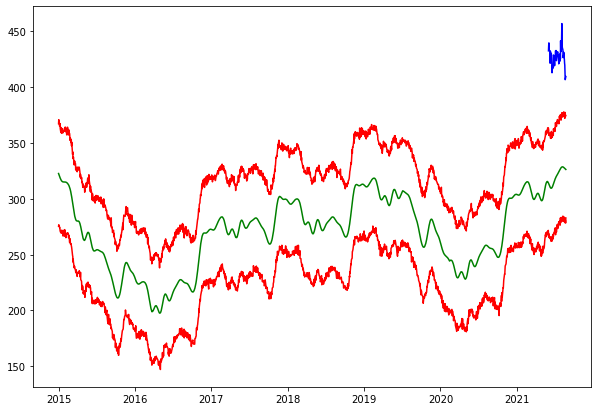

In [20]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.plot(indexed_data_pred.yhat_upper,color='red')
plt.plot(indexed_data_pred.yhat_lower,color='red')
plt.plot(indexed_data_pred.yhat,color='green')

plt.plot(indexed_test_df.Close,color='blue')
plt.show()

In [21]:
indexed_test_df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-08-16,SBIN,EQ,431.20,430.00,434.00,424.00,424.20,424.85,427.58,17608693,7.529193e+14,191627,7042291,0.3999
2021-08-17,SBIN,EQ,424.85,424.85,425.85,415.25,420.95,421.50,420.55,22957877,9.655008e+14,258740,7034869,0.3064
2021-08-18,SBIN,EQ,421.50,422.15,424.35,418.00,418.90,419.70,421.30,17668574,7.443718e+14,265793,5045996,0.2856
2021-08-20,SBIN,EQ,419.70,415.00,417.35,405.15,406.00,406.70,411.06,25541790,1.049926e+15,286336,9038684,0.3539
2021-08-23,SBIN,EQ,406.70,411.10,413.00,401.25,408.60,409.50,408.45,26559937,1.084838e+15,229422,9962420,0.3751


In [22]:
indexed_data_pred.tail()

,yhat_lower,yhat_upper,yhat
ds,,,
2021-08-19,282.498381,377.407114,326.947974
2021-08-20,279.341689,373.068514,326.769696
2021-08-21,280.661784,373.996596,326.603422
2021-08-22,278.283292,374.041180,326.451371
2021-08-23,282.865106,374.667385,326.315095


The prediction was not so cool. Lets think of how to develop the prediction.

What we have now is :

predicted data stored in data_predict and the actual data in test_df

In [23]:
data_predict.head()

,ds,yhat_lower,yhat_upper,yhat
0,2015-01-01,275.425697,367.318862,322.669479
1,2015-01-02,276.779725,370.875388,322.142050
2,2015-01-05,274.638970,366.516475,320.523635
3,2015-01-06,274.205743,365.005343,319.989712
4,2015-01-07,274.394992,364.968528,319.467435


In [24]:
pred_data=data_predict.iloc[1586:,:]
pred_data.columns=['Date','UpperLimit','LowerLimit','PredictedValue']
pred_data.head()

,Date,UpperLimit,LowerLimit,PredictedValue
1586,2021-06-01,269.362460,362.929019,314.056310
1587,2021-06-02,265.686787,361.471911,313.591073
1588,2021-06-03,268.622914,357.189708,313.098971
1589,2021-06-04,266.439796,358.601884,312.594053
1590,2021-06-05,265.450282,356.712769,312.090192


In [25]:
test_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2021-06-01,SBIN,EQ,424.35,426.05,435.35,425.60,432.55,432.55,430.82,59299647,2.554720e+15,442654,13242056,0.2233
1,2021-06-02,SBIN,EQ,432.55,430.80,437.95,429.15,437.20,437.25,434.97,38657806,1.681491e+15,307884,10906691,0.2821
2,2021-06-03,SBIN,EQ,437.25,437.00,441.95,433.50,439.05,439.65,437.30,38909199,1.701505e+15,281959,12855035,0.3304
3,2021-06-04,SBIN,EQ,439.65,437.50,441.90,431.75,434.30,433.60,436.25,36898769,1.609708e+15,331404,9568540,0.2593
4,2021-06-07,SBIN,EQ,433.60,435.10,437.40,430.80,431.30,432.25,434.78,20201197,8.783035e+14,174837,6487715,0.3212


Now lets look into the data more precisely.Lets findout some correlations

In [26]:
# Using the training data back again.
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [27]:
for col in df.columns[3:]:
  print(col)
  for col2 in df.columns[3:]:
    if list(df.columns).index(col2)>list(df.columns).index(col):
      value=spearmanr(df[col],df[col2])
      print(f" {col2}({value[0]})",end=' ')
  print('\n')

Prev Close
 Open(0.997986266664809)  High(0.9941734890987394)  Low(0.994445497218373)  Last(0.9897266673049585)  Close(0.9900071439818516)  VWAP(0.9945264340881365)  Volume(-0.032115378115011924)  Turnover(0.2221098543730272)  Trades(0.065952869004232)  Deliverable Volume(0.0031367800866752824)  %Deliverble(0.0839777155546054) 

Open
 High(0.9961253819303497)  Low(0.9959793162724131)  Last(0.9915032241442404)  Close(0.9918358475292552)  VWAP(0.9962976852566426)  Volume(-0.03130790420473513)  Turnover(0.22295388436618568)  Trades(0.06671352489635911)  Deliverable Volume(0.0032606651872926226)  %Deliverble(0.08308451466555627) 

High
 Low(0.9946028640473275)  Last(0.9965144052483367)  Close(0.9967082982499782)  VWAP(0.9986516199337437)  Volume(-0.0033874568274297506)  Turnover(0.25070531992568174)  Trades(0.09423274083754649)  Deliverable Volume(0.02767773198804286)  %Deliverble(0.07226277003787897) 

Low
 Last(0.9958492338734594)  Close(0.9961333139172621)  VWAP(0.9980531171071306)  Vol

Instead of using Close , Open , Prev Close, High , Low, Last columns we will use only one column which will represent all of this. For this purpose i will 

### Linear Regression  -- predicting the closing value

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
X_train=df.drop(columns=['Date',	'Symbol' ,	'Series' , 'Close'])
y_train=df.Close
X_test=test_df.drop(columns=['Date',	'Symbol' ,	'Series' , 'Close'])
y_test=test_df.Close

In [30]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

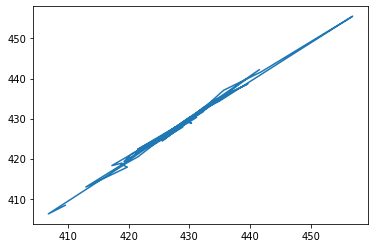

In [31]:
plt.plot(y_test,y_pred)

As we can see the graph is very close to 45 degree to horizontal .Hence can be concluded as very accurate prediction. But this prediction got no value in gaining profits from share market, because this prediction takes all the data of that present day to calculate closing of that day. Its very important to notice that we have the data of high, low, vwap , volume etc only after the traiding closes for that day. So lets try predicting more effective things.

How about predicting the data based upon the previous days data. We will use closing as our target.

Lets try predicting the closing price of next day based upon present day market data.

In [32]:
X_train.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,311.85,312.45,315.00,310.70,314.0,313.67,6138488,1.925489e+14,58688,1877677,0.3059
1,314.00,314.35,318.30,314.35,315.6,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2,315.25,316.25,316.80,312.10,312.8,313.84,9136716,2.867432e+14,88236,3845173,0.4208
3,312.75,310.00,311.10,298.70,299.9,305.14,15329257,4.677601e+14,169268,7424847,0.4844
4,299.90,300.00,302.55,295.15,301.4,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [33]:
import math
X_train['Close']=df.Close
y_train=y_train[1:]
y_train[-1]=(math.nan)

In [34]:
y_train=pd.Series(list(y_train))
y_train

0       315.25
1       312.75
2       299.90
3       300.15
4       304.85
         ...  
1581    413.55
1582    425.20
1583    422.05
1584    424.35
1585       NaN
Length: 1586, dtype: float64

In [35]:
X_train.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close
0,311.85,312.45,315.00,310.70,314.0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00
1,314.00,314.35,318.30,314.35,315.6,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25
2,315.25,316.25,316.80,312.10,312.8,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75
3,312.75,310.00,311.10,298.70,299.9,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90
4,299.90,300.00,302.55,295.15,301.4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15


In [36]:
X_test['Close']=test_df.Close
X_test.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close
0,424.35,426.05,435.35,425.60,432.55,430.82,59299647,2.554720e+15,442654,13242056,0.2233,432.55
1,432.55,430.80,437.95,429.15,437.20,434.97,38657806,1.681491e+15,307884,10906691,0.2821,437.25
2,437.25,437.00,441.95,433.50,439.05,437.30,38909199,1.701505e+15,281959,12855035,0.3304,439.65
3,439.65,437.50,441.90,431.75,434.30,436.25,36898769,1.609708e+15,331404,9568540,0.2593,433.60
4,433.60,435.10,437.40,430.80,431.30,434.78,20201197,8.783035e+14,174837,6487715,0.3212,432.25


In [37]:
y_test=y_test[1:]

In [38]:
y_test=pd.Series(list(y_test))
y_test.head()

0    437.25
1    439.65
2    433.60
3    432.25
4    427.20
dtype: float64

In [39]:
model=LinearRegression()
model.fit(X_train.iloc[:-1,:],y_train[:-1])
y_predict=model.predict(X_test)

In [40]:
y_predict=y_predict[:-1] #406.62751685 is the value removed.

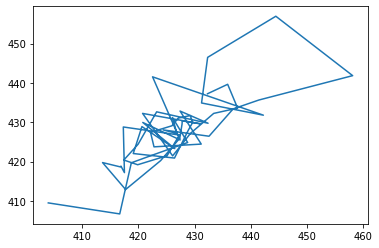

In [41]:
plt.plot(y_predict,y_test)

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_predict,y_test)

4.839324384756205

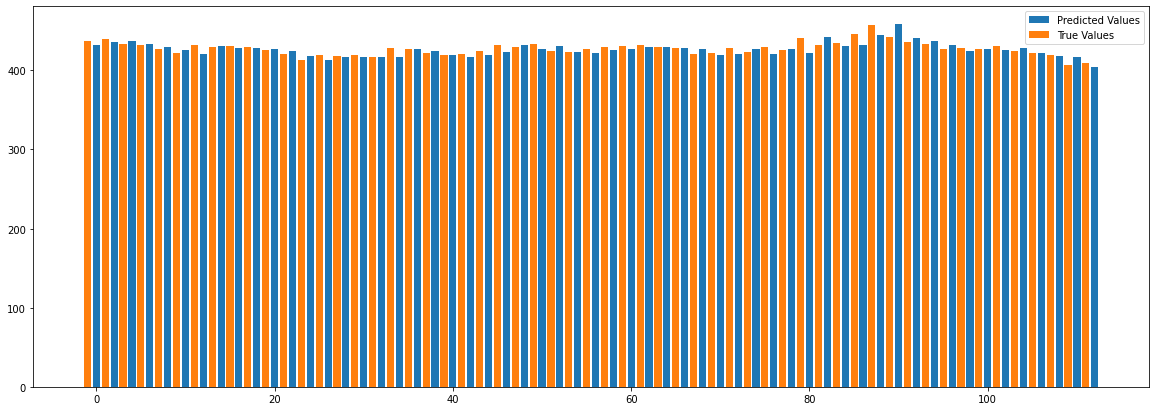

In [43]:
from datetime import datetime,timedelta
import numpy as np
 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
 
plot_x_axis_values=np.arange(len(test_df)-1)
 
plt.bar(2*plot_x_axis_values,y_predict,label='Predicted Values')
plt.bar(2*(plot_x_axis_values)-1,y_test,label='True Values')
# i have used even positions for predicted values and odd positions for true values .
plt.legend()
plt.show()

## Random forest regressor for predicting closing value

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=1)
model.fit(X_train[:-1],y_train[:-1])
y_pred_rf=model.predict(X_test)

In [45]:
y_pred_rf=y_pred_rf[:-1]

In [47]:
np.array(y_test)

array([437.25, 439.65, 433.6 , 432.25, 427.2 , 421.45, 432.25, 429.6 ,
       430.35, 429.5 , 425.95, 420.25, 412.9 , 419.75, 418.65, 418.85,
       417.2 , 428.8 , 426.75, 421.5 , 419.2 , 420.4 , 424.4 , 432.65,
       429.75, 432.85, 424.45, 423.75, 427.45, 429.1 , 431.05, 431.7 ,
       430.  , 427.9 , 420.9 , 422.05, 428.9 , 423.3 , 429.95, 425.5 ,
       441.55, 431.8 , 434.9 , 446.5 , 456.95, 441.85, 435.65, 433.4 ,
       426.45, 428.05, 427.15, 431.2 , 424.85, 421.5 , 419.7 , 406.7 ,
       409.5 ])

In [48]:
mean_absolute_error(y_test,y_pred_rf)

9.986078947368641

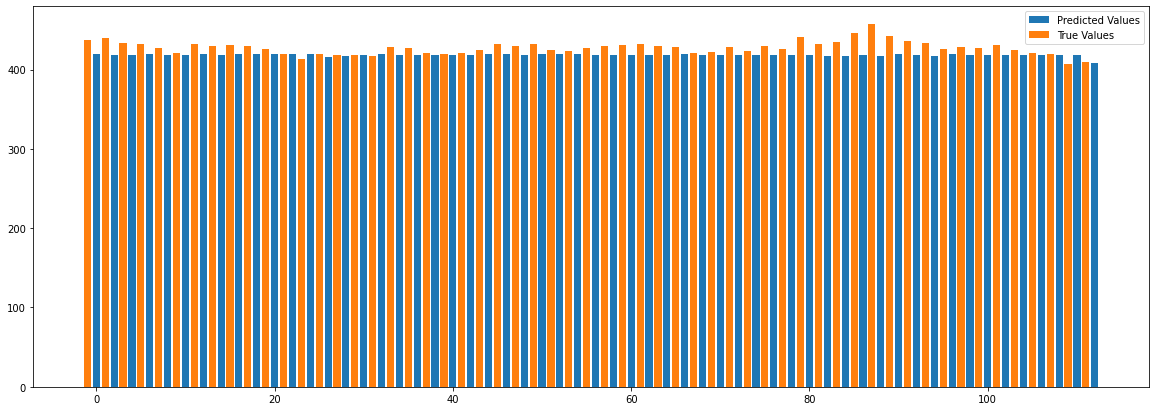

In [49]:
 
from datetime import datetime,timedelta
import numpy as np
 
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)
 
plot_x_axis_values=np.arange(len(test_df)-1)
 
plt.bar(2*plot_x_axis_values,y_pred_rf,label='Predicted Values')
plt.bar(2*(plot_x_axis_values)-1,y_test,label='True Values')
# i have used even positions for predicted values and odd positions for true values .
plt.legend()
plt.show()

Random forest is not good here , rather linear regression performs best.

In [62]:
X_train.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close
0,311.85,312.45,315.00,310.70,314.0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00
1,314.00,314.35,318.30,314.35,315.6,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25
2,315.25,316.25,316.80,312.10,312.8,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75
3,312.75,310.00,311.10,298.70,299.9,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90
4,299.90,300.00,302.55,295.15,301.4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15


In [63]:
# I want to check if there is a way to reduce dimensionality of the X_train
X_train.head()# i will drop Open	High	Low	Last
model=LinearRegression()
model.fit(X_train.drop(columns=['Prev Close','Open'	,'High'	,'Low'	,'Last'])[:-1],y_train[:-1])
y_pred=model.predict(X_test.drop(columns=['Prev Close','Open'	,'High'	,'Low'	,'Last']))
mean_absolute_error(y_pred[:-1],y_test)

# previously the error was 4.839324384756205

4.845229534747982

I reduced some simmilar dimension (like ['Prev Close','Open'	,'High'	,'Low'	,'Last']) because i will be adding more important dimensions.


I got a plan to achieve more accurate result. 

I will use the predicted values of linear regression model to predict more accurate result.

In [181]:
X_train_modified=X_train.drop(columns=['Prev Close','Open'	,'High'	,'Low'	,'Last'])
X_test_modified=X_test.drop(columns=['Prev Close','Open'	,'High'	,'Low'	,'Last'])
X_train_modified=X_train_modified[:-1]
y_train_modified=y_train[:-1]
X_test_modified=X_test_modified[:-1]
y_test_modified=y_test

In [75]:
# Lets introduce a new column in training dataset which will contain the predicted closing value
X_train_modified['Prev Prediction']=model.predict(X_train_modified)# this model has the previously created model which was trained on X_train.drop(columns=['Prev Close','Open'	,'High'	,'Low'	,'Last'])[:-1],y_train[:-1]
X_train_modified['Actual Closing']=y_train_modified
X_train_modified.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close,Prev Prediction,Actual Closing
0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00,313.512154,315.25
1,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25,314.646453,312.75
2,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75,312.186383,299.90
3,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90,299.209770,300.15
4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15,299.843052,304.85


In [93]:
l=[]
for i in range(len(X_train_modified['Prev Prediction'])):
  l.append(abs(X_train_modified['Prev Prediction'][i]-X_train_modified['Actual Closing'][i]))

l=np.array(l)

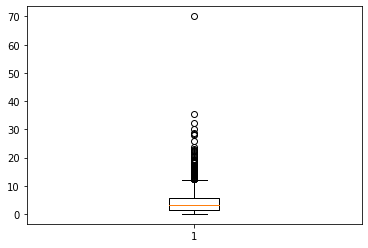

In [94]:
plt.boxplot(np.array(l))
plt.show()

**All about a box plot**

Steps:

1. Calculate the median and the lower and upper quartiles.
Plot a symbol at the median and draw a box between the lower and upper quartiles.

2. Calculate the interquartile range (the difference between the upper and lower quartile) and call it IQ.


3. Calculate the following points:
L1 = lower quartile - 1.5*IQ
L2 = lower quartile - 3.0*IQ
U1 = upper quartile + 1.5*IQ
U2 = upper quartile + 3.0*IQ



4. The line from the lower quartile to the minimum is now drawn from the lower quartile to the smallest point that is greater than L1. Likewise, the line from the upper quartile to the maximum is now drawn to the largest point smaller than U1.




5. Points between L1 and L2 or between U1 and U2 are drawn as small circles. Points less than L2 or greater than U2 are drawn as large circles.

Now i will introduce another column Score. Score column will have only 5 types of values -- -5,-3,1,3,5.

[labelling of boxplot](https://cdn.educba.com/academy/wp-content/uploads/2019/11/R-Boxplot-Labels-blank-output-3.png)

If the absolute difference between the value of Actual Closing and Prev pred lies

*   -5 :  above 75 percentile
*   -3 : 50 percentile-75percentile
*    1: 25percentile-50th percentile
*    5 : below 25th percentile



In [105]:
score=[]
for i in range(len(X_train_modified)):
  val=abs(X_train_modified['Actual Closing'][i]-X_train_modified['Prev Prediction'][i])
  if val<=np.percentile(l,25) :
    score.append(5)
  elif val>np.percentile(l,25) and val<=np.percentile(l,50):
    score.append(1)
  elif val>np.percentile(l,50) and val<=np.percentile(l,75):
    score.append(-3)
  elif val>np.percentile(l,75):
    score.append(-5)


X_train_modified['Score']=pd.Series(score)
X_train_modified.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close,Prev Prediction,Actual Closing,Score
0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00,313.512154,315.25,1
1,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25,314.646453,312.75,1
2,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75,312.186383,299.90,-5
3,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90,299.209770,300.15,5
4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15,299.843052,304.85,-3


In [106]:
X_train_modified.drop(columns=['Actual Closing'],inplace=True)

In [109]:
model.fit(X_train_modified,y_train_modified)
y_pred=model.predict(X_train_modified)
mean_absolute_error(y_pred,y_train_modified)
#mean absolute error has significantly decreased

4.313229295169402

How about iterating this steps many number of time. will there be significant change in mean absolute error? Lets try!

In [126]:
def Score_col(xtrain,ytrain,iteration):
  model=LinearRegression()
  for i in range(iteration):

    #creation of prev prediction column
    model.fit(xtrain,ytrain)
    xtrain['Prev Prediction']=model.predict(xtrain)
    
    #calculating the absolute difference between predicted and actual values
    l=[]
    for i in range(len(xtrain)):
      l.append(abs(xtrain['Prev Prediction'][i]-ytrain[i]))

    l=np.array(l)


    #calculation of score based upon absolute difference
    score=[]
    for i in range(len(xtrain)):
      val=abs(ytrain[i]-xtrain['Prev Prediction'][i])
      if val<=np.percentile(l,25) :
        score.append(5)
      elif val>np.percentile(l,25) and val<=np.percentile(l,50):
        score.append(1)
      elif val>np.percentile(l,50) and val<=np.percentile(l,75):
        score.append(-3)
      elif val>np.percentile(l,75):
        score.append(-5)

    #setting the Score column
    xtrain['Score']=pd.Series(score)

  return mean_absolute_error(ytrain,xtrain['Prev Prediction'])

In [128]:
X_train_modified.drop(columns=['Score','Prev Prediction'],inplace=True)

In [139]:
Score_col(X_train_modified,y_train_modified,100)

4.312851241396598

In [149]:
# error_lst=[]
# for i in range(100):
#   error_lst.append(Score_col(X_train_modified,y_train_modified,i))

#This code will take more than an hour to run
#The observation from this experiment is below
#For saving time i am copying paste the result error_lst here in this cell. But this list is only for this data only.
error_lst=[4.312851241396598,4.312851739170011,4.312848032568021,4.312853815579532,4.312846381116228,4.31285062051913,4.312854023748609,4.31285214151974,4.31285417571706,4.3128477624568085,4.312851754932692,4.312851618782917,4.312853630349118,4.312846817350922,4.312847767809965,4.3128541967059455,4.312846554836221,4.312851386378834,4.312853815579531,4.312852757116105,4.312847762456808,4.3128516187829185,4.312849957511127,4.312852537647995,4.312853139794305,4.312846827795247,4.3128540237486055,4.312853516519198,4.312849867829745,4.312847767809965,4.3128531397943055,4.312851739170008,4.312847450970313,4.312851618782917,4.312850386985345,4.312853139794308,4.312853815579533,4.31285206001173,4.3128534845528215,4.3128541967059455,4.312846827795247,4.312854175717061,4.312853630349117,4.312847047260786,4.312851241396596,4.312847762456812,4.312846817350922,4.312852753102807,4.312854023748609,4.312849146281907,4.312854196705944,4.312853815579535,4.312850538095603,4.312852537647995,4.312851241396598,4.312851754932693,4.312852537647998,4.312848032568019,4.312845602836219,4.3128541967059455,4.312850620519132,4.312849867829746,4.312852753102807,4.312854175717064,4.312850386985346,4.312851241396595,4.312851618782913,4.31284580874684,4.312854175717059,4.312847767809966,4.312846381116226,4.3128534845528215,4.312851386378832,4.312845602836219,4.312853139794306,4.3128477624568085,4.312847047260785,4.3128474509703185,4.312852537647995,4.3128527571161035,4.312847767809962,4.312854023748605,4.312849523421399,4.312854023748608,4.312847767809962,4.312852757116105,4.312852537647995,4.312847450970315,4.312847047260783,4.312847762456812,4.312853139794301,4.31284560283622,4.3128513863788225,4.312853484552824,4.312846381116228,4.312847767809964,4.312854175717063,4.31284580874684,4.312851618782919,4.312851241396598]


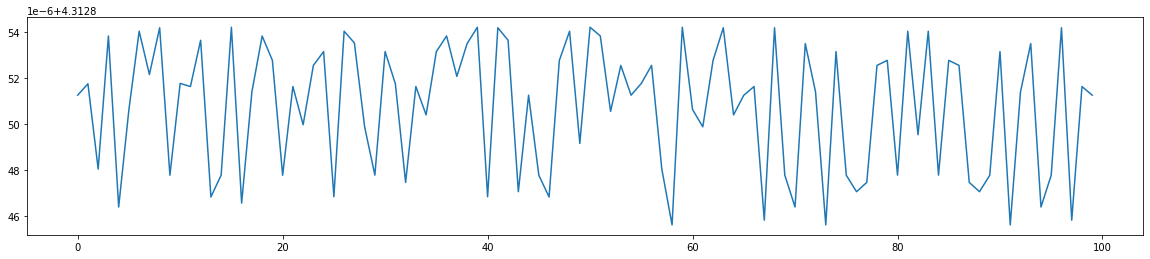

In [153]:
f=plt.figure()
f.set_figwidth(20)
plt.plot(error_lst)
plt.show()

In [159]:
print(f"Maximum mean absolute error is {max(error_lst)} and Minimum is {min(error_lst)} difference of them is {max(error_lst) - min(error_lst)}")

Maximum mean absolute error is 4.3128541967059455 and Minimum is 4.312845602836219 difference of them is 8.593869726070125e-06


So as per observation doing this step once or thousand time will have no such powerful change in mean absolute error. So we can achieve our goal by doing it once only.

In [162]:
X_train_modified.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close,Prev Prediction,Score
0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00,313.492398,1
1,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25,314.625218,1
2,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75,312.254233,-5
3,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90,299.119844,5
4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15,299.876767,-3


In [138]:
y_train_modified

0       315.25
1       312.75
2       299.90
3       300.15
4       304.85
         ...  
1580    412.35
1581    413.55
1582    425.20
1583    422.05
1584    424.35
Length: 1585, dtype: float64

## Predicting the Test Data

Now its important to predict for test data also.

Steps:

First we will perform a basic prediction and store it as Prev Prediction.

 Second, We will train a model2 on training data which will predict the score as we cannot use y test for prediction testing data.
### ---
 Resources which i have :

 Model object which i will use at last for prediction the finsal.

### ----
 Resources to create:
 model1 which will predict the first step.

 model2 for second step.

In [182]:
X_test_modified.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close
0,430.82,59299647,2.554720e+15,442654,13242056,0.2233,432.55
1,434.97,38657806,1.681491e+15,307884,10906691,0.2821,437.25
2,437.30,38909199,1.701505e+15,281959,12855035,0.3304,439.65
3,436.25,36898769,1.609708e+15,331404,9568540,0.2593,433.60
4,434.78,20201197,8.783035e+14,174837,6487715,0.3212,432.25


In [183]:
model1=LinearRegression()
model1.fit(X_train_modified.drop(columns=['Score','Prev Prediction']),y_train_modified)
y_pred=model1.predict(X_test_modified)
mean_absolute_error(y_pred,y_test_modified)

4.845229534747982

In [184]:
X_test_modified['Prev Prediction']=y_pred

model2=RandomForestRegressor(random_state=1)
model2.fit(X_train_modified.drop(columns=['Score']),X_train_modified.Score)
test_score_col=model2.predict(X_test_modified)
X_test_modified['Score']=test_score_col

In [191]:
X_test_modified.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close,Prev Prediction,Score
0,430.82,59299647,2.554720e+15,442654,13242056,0.2233,432.55,432.683059,-0.72
1,434.97,38657806,1.681491e+15,307884,10906691,0.2821,437.25,436.517114,-0.12
2,437.30,38909199,1.701505e+15,281959,12855035,0.3304,439.65,438.905206,-1.14
3,436.25,36898769,1.609708e+15,331404,9568540,0.2593,433.60,432.527768,-0.22
4,434.78,20201197,8.783035e+14,174837,6487715,0.3212,432.25,430.545531,-0.44


In [185]:
y_pred=model.predict(X_test_modified)
mean_absolute_error(y_pred,y_test_modified)

4.846504469103667

!! error has grown. So from here we can say that this type of machine learning algorithm is efficient for predicting out of a given large data. as we have seen the error has significantly reduced while we performed this prediction technique in the training data itself . So predicting out a result after training on a robust data can be efficient through this technique.

Lets explore the training data a bit

In [190]:
df=X_train_modified.copy()
df.head()

,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close,Prev Prediction,Score
0,313.67,6138488,1.925489e+14,58688,1877677,0.3059,314.00,313.492398,1
1,316.80,9935094,3.147389e+14,79553,4221685,0.4249,315.25,314.625218,1
2,313.84,9136716,2.867432e+14,88236,3845173,0.4208,312.75,312.254233,-5
3,305.14,15329257,4.677601e+14,169268,7424847,0.4844,299.90,299.119844,5
4,299.95,15046745,4.513243e+14,147185,5631400,0.3743,300.15,299.876767,-3


PLotting Score vs  VWAP


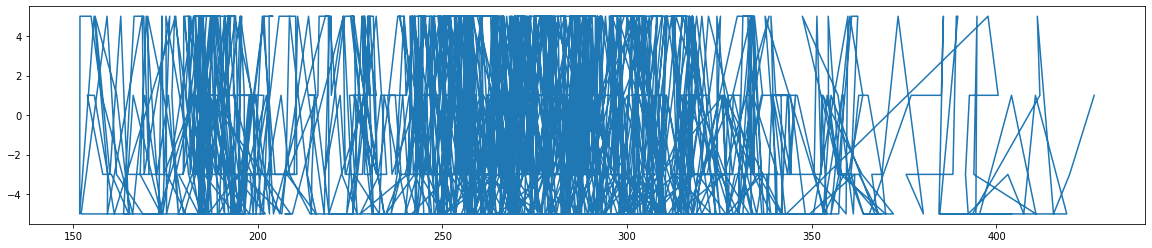


PLotting Score vs  Volume


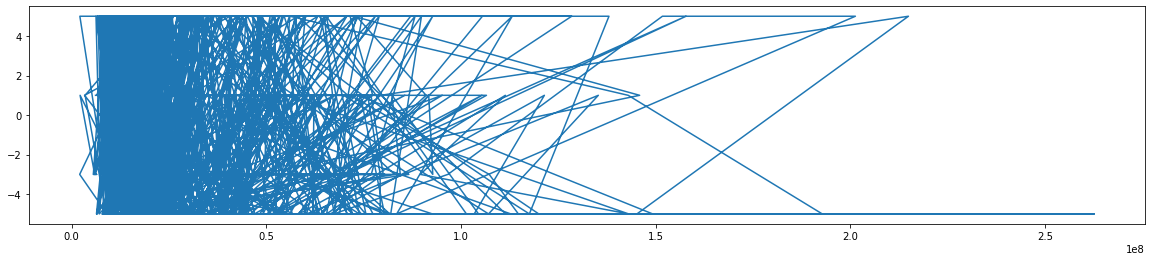


PLotting Score vs  Turnover


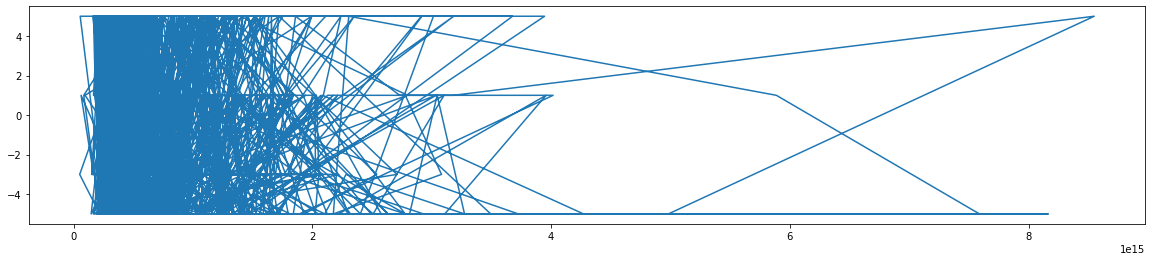


PLotting Score vs  Trades


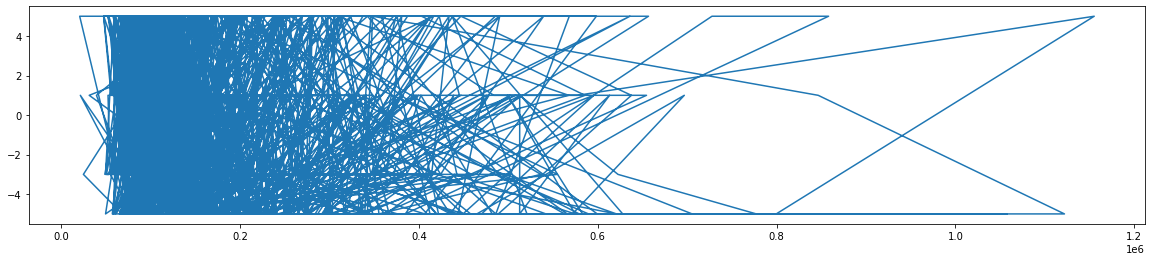


PLotting Score vs  Deliverable Volume


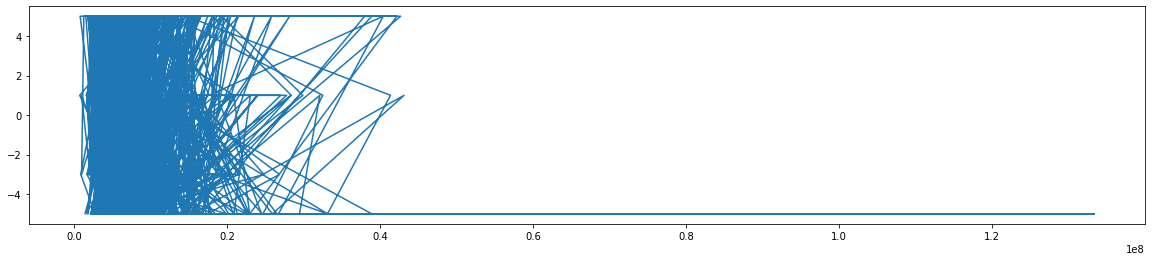


PLotting Score vs  %Deliverble


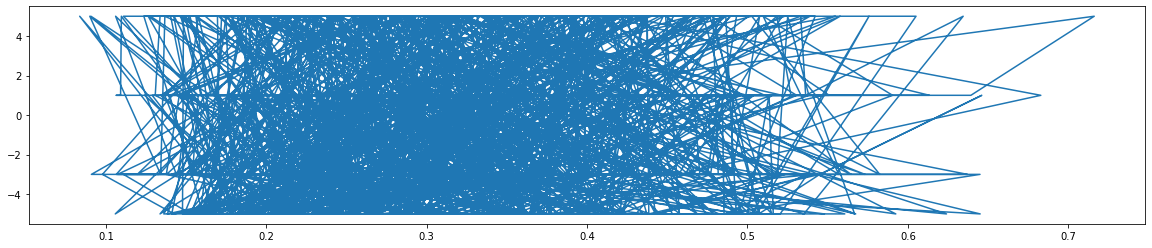


PLotting Score vs  Close


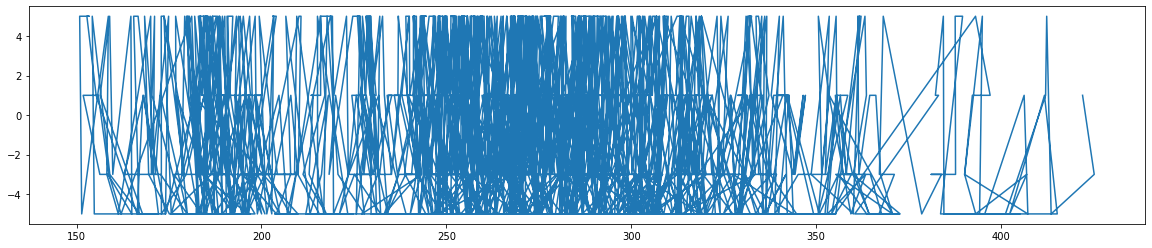


PLotting Score vs  Prev Prediction


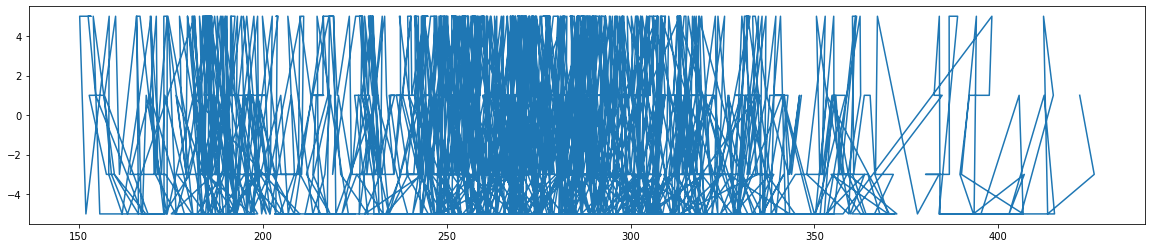

In [180]:
# i want to check how is this score variable getting correlated with all other variables in the data set.
for i in df.columns[:-1]:
  f=plt.figure()
  f.set_figwidth(20)
  print("PLotting Score vs ",i)
  plt.plot(df[i],df.Score)
  plt.show()
  print()

Variation of  VWAP with time


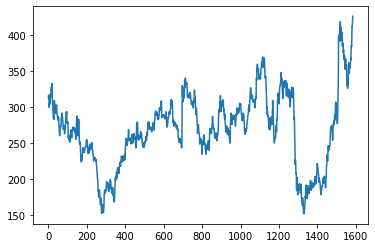

Variation of  Volume with time


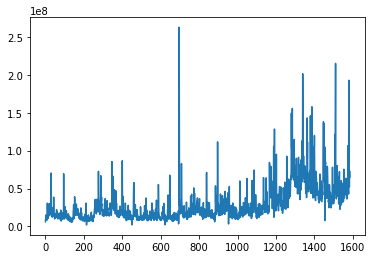

Variation of  Turnover with time


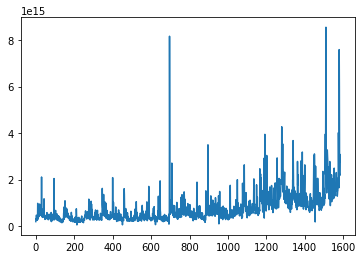

Variation of  Trades with time


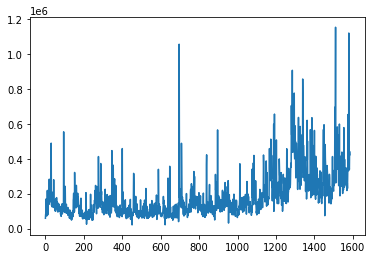

Variation of  Deliverable Volume with time


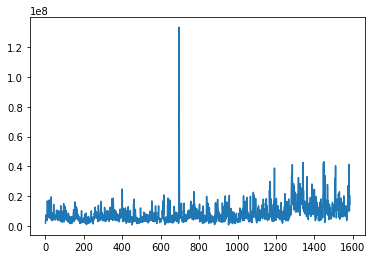

Variation of  %Deliverble with time


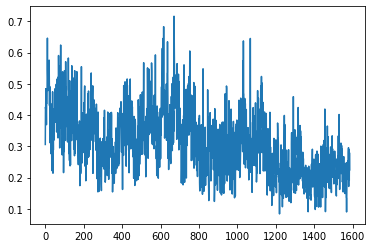

Variation of  Close with time


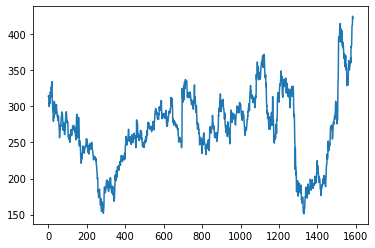

Variation of  Prev Prediction with time


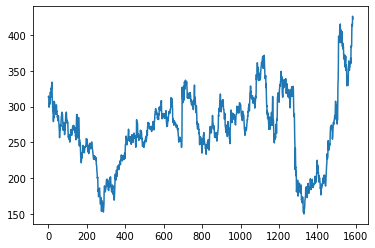

Variation of  Score with time


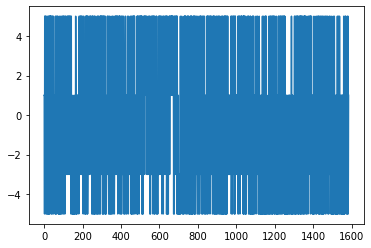

In [189]:
for i in df.columns:
  print("Variation of ",i,"with time")
  plt.plot(range(len(df)),df[i])
  plt.show()

Now the Major concern is to predict more accurately. For this we need to introduce some more variables.This time we will take help from other datasets to increase efficiency of prediction.